In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import stats

In [10]:
sat=pd.read_csv(r'C:\Users\rober\Documents\Data Science\GitHub\DIY projects\Datasets\sat_scores.csv') #importing datafile

In [11]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [12]:
sat[sat.duplicated()] #checking for duplicates

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score


In [13]:
sat.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [14]:
sat=sat.drop('student_id', axis=1) #dropping Student ID as it has no bearing on data

In [15]:
sat.describe(include='object').T #checking unique entries for non-numeric categories

,count,unique,top,freq
gender,1000,3,Female,481
part_time_job,1000,2,No,785
diet_quality,1000,3,Fair,437
parental_education_level,909,3,High School,392
internet_quality,1000,3,Good,447
extracurricular_participation,1000,2,No,682


In [17]:
#changing object data to numeric
sat['gender']=sat['gender'].replace('Male', 1)#encoding

In [18]:
sat['gender']=sat['gender'].replace('Female', 2) #encoding

In [19]:
sat['gender']=sat['gender'].replace('Other',3) #encoding

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\2001073779.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sat['gender']=sat['gender'].replace('Other',3) #encoding


In [20]:
sat['gender'] = sat['gender'].astype('int64')

In [21]:
# Convert 'part_time_job' to numerical categories and set type to int64
sat['part_time_job'] = sat['part_time_job'].replace({'Yes': 1, 'No': 0})
sat['part_time_job'] = sat['part_time_job'].astype('int64')
sat['part_time_job'].value_counts()

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\4150143804.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sat['part_time_job'] = sat['part_time_job'].replace({'Yes': 1, 'No': 0})


part_time_job
0    785
1    215
Name: count, dtype: int64

In [23]:
sat['diet_quality'].value_counts() #checking unique entries for diet quality

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

In [24]:
sat['diet_quality']=sat['diet_quality'].replace({'Poor':1,'Fair':2,'Good':3}) #encoding
sat['diet_quality']=sat['diet_quality'].astype('int64')

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\246306962.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sat['diet_quality']=sat['diet_quality'].replace({'Poor':1,'Fair':2,'Good':3}) #encoding


In [25]:
sat['parental_education_level'].value_counts() #checking unique entries for parental education level

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [57]:
sat['parental_education_level']=sat['parental_education_level'].replace({'High School':1,'Bachelor':2,'Master': 3}) #encoding

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\2467390937.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sat['parental_education_level']=sat['parental_education_level'].replace({'High School':1,'Bachelor':2,'Master': 3}) #encoding


In [58]:
sat['parental_education_level'].replace(np.nan, (sat['parental_education_level'].mode()[0]), inplace=True) #filling null values with mode

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\2347094713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sat['parental_education_level'].replace(np.nan, (sat['parental_education_level'].mode()[0]), inplace=True) #filling null values with mode


In [27]:
sat['internet_quality'].value_counts()

internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64

In [28]:
sat['internet_quality']=sat['internet_quality'].replace({'Poor':1,'Average':2,'Good':3}) #encoding

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\1052071562.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sat['internet_quality']=sat['internet_quality'].replace({'Poor':1,'Average':2,'Good':3}) #encoding


In [29]:
sat['internet_quality'].astype('int64')

0      2
1      2
2      1
3      3
4      3
      ..
995    3
996    2
997    3
998    2
999    2
Name: internet_quality, Length: 1000, dtype: int64

In [30]:
sat['extracurricular_participation'].value_counts()

extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64

In [31]:
sat['extracurricular_participation']=sat['extracurricular_participation'].replace({'Yes':1,'No':0}) #encoding

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\2380879427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sat['extracurricular_participation']=sat['extracurricular_participation'].replace({'Yes':1,'No':0}) #encoding


In [32]:
sat['extracurricular_participation']=sat['extracurricular_participation'].astype('int64')

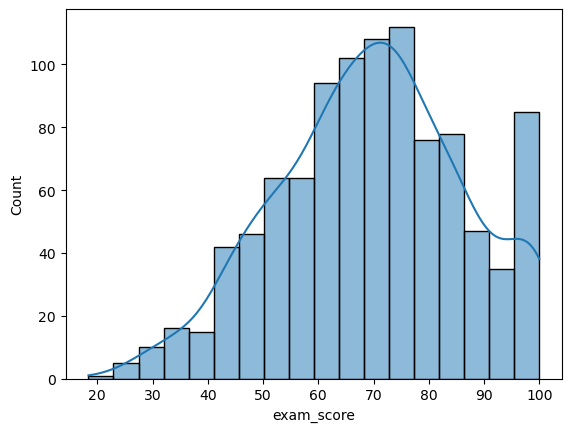

In [33]:
#visualizing distribution of exam scores
sns.histplot (sat['exam_score'], kde=True);

C:\Users\rober\AppData\Local\Temp\ipykernel_31844\2014436597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_bins, y=sat['exam_score'], palette='viridis')


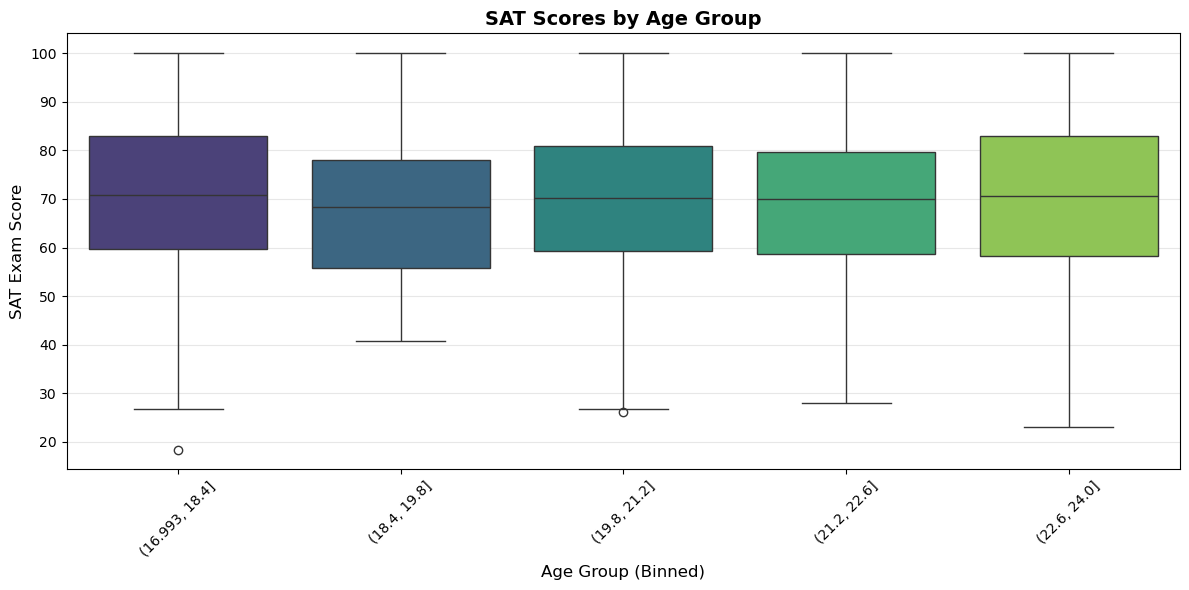

In [34]:
# Bin ages into 5 groups and plot SAT scores by age bin using a boxplot
age_bins = pd.cut(sat['age'], bins=5)
plt.figure(figsize=(12,6))
sns.boxplot(x=age_bins, y=sat['exam_score'], palette='viridis')
plt.xlabel('Age Group (Binned)', fontsize=12)
plt.ylabel('SAT Exam Score', fontsize=12)
plt.title('SAT Scores by Age Group', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

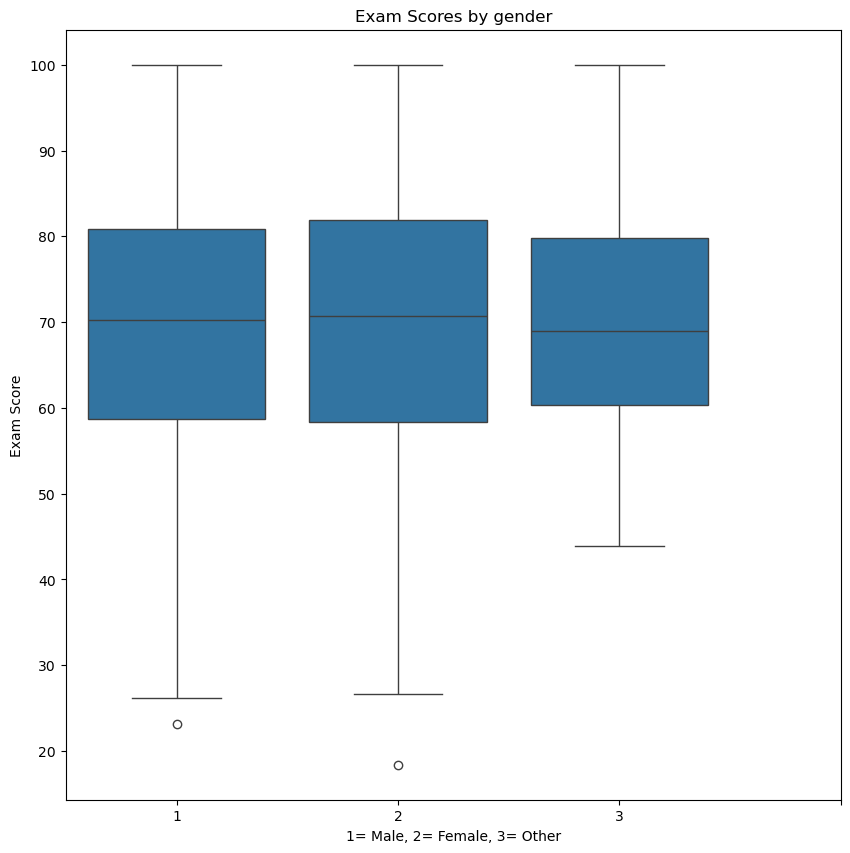

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot (x=sat['gender'],y=sat['exam_score'])
plt.xticks([0,1,2,3])
plt.xlabel('1= Male, 2= Female, 3= Other')
plt.ylabel('Exam Score')
plt.title('Exam Scores by gender'); #visualizing exam scores by gender

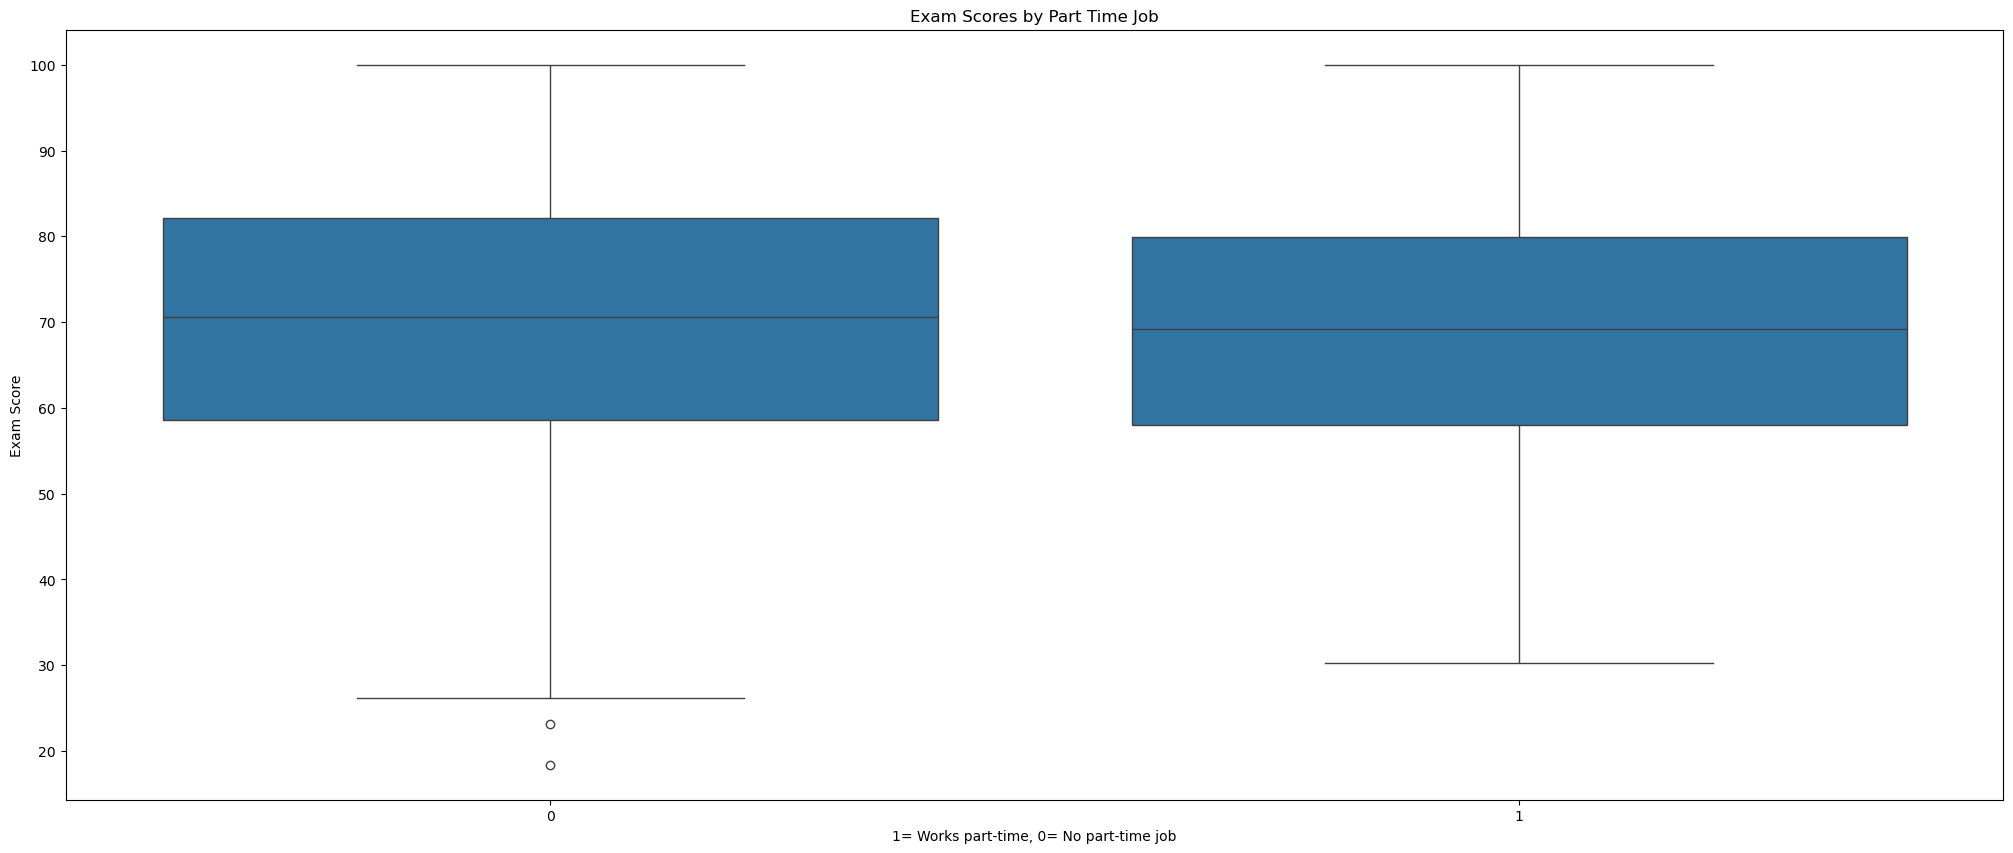

In [50]:
plt.figure(figsize=(25,10))
sns.boxplot (x=sat['part_time_job'], y=sat['exam_score'])
plt.xlabel('1= Works part-time, 0= No part-time job')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Part Time Job'); #visualizing exam scores by part time job
plt.show()

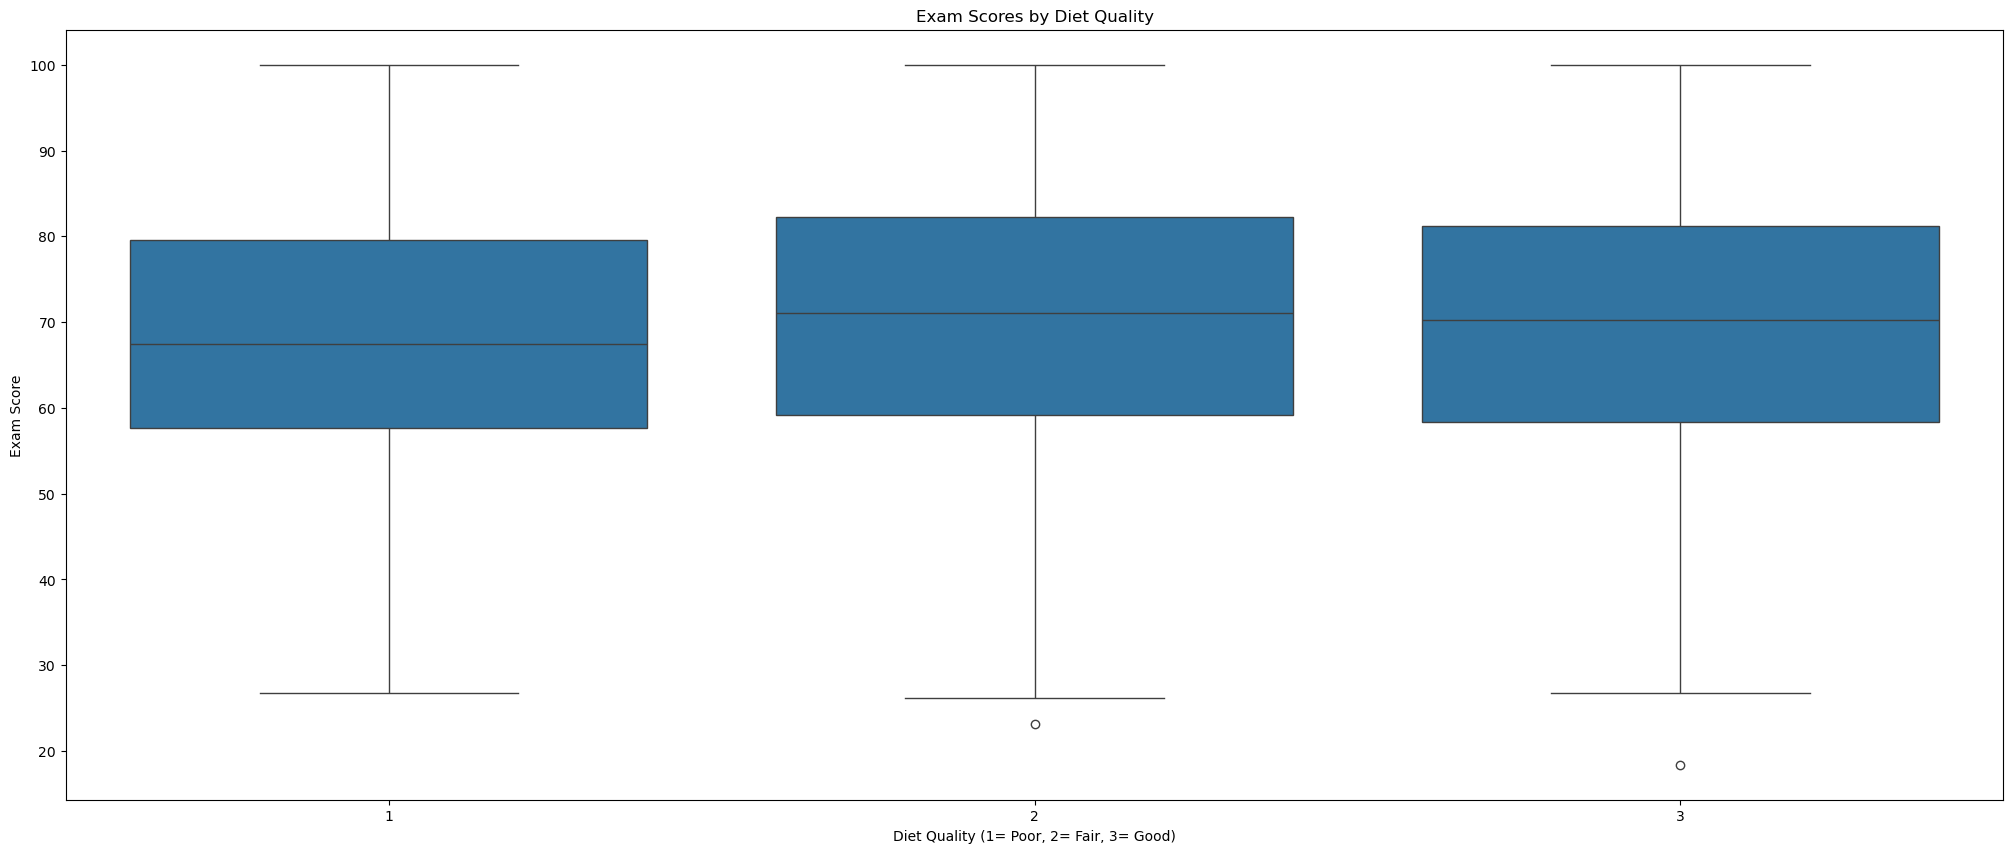

In [52]:
plt.figure(figsize=(25,10))
sns.boxplot(x=sat['diet_quality'], y=sat['exam_score'])
plt.xlabel('Diet Quality (1= Poor, 2= Fair, 3= Good)')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Diet Quality'); #visualizing exam scores by diet quality

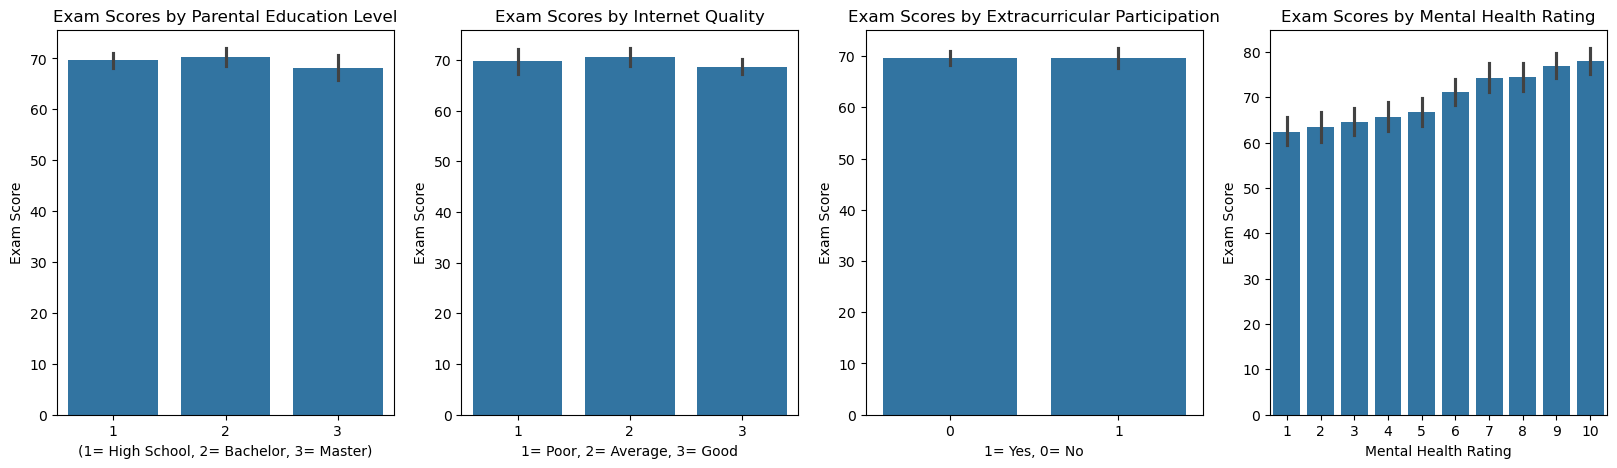

In [129]:
#visualizing exam scores by parental education level, internet quality, extracurricular participation, and mental health rating
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.xlabel('(1= High School, 2= Bachelor, 3= Master)')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Parental Education Level')
sns.barplot(x=sat['parental_education_level'], y=sat['exam_score'])
plt.subplot(1,4,2)
plt.xlabel('1= Poor, 2= Average, 3= Good')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Internet Quality')
sns.barplot (x=sat['internet_quality'], y=sat['exam_score'])
plt.subplot(1,4,3)
plt.xlabel('1= Yes, 0= No')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Extracurricular Participation')
sns.barplot (x=sat['extracurricular_participation'], y=sat['exam_score'])
plt.subplot(1,4,4)
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Mental Health Rating')
sns.barplot(x=sat['mental_health_rating'], y=sat['exam_score'])
plt.show()

**PRELIMINARY OBSERVATIONS**

No duplicate data.

There were missing values for Parental Education, so I filled those with the mode of that column.

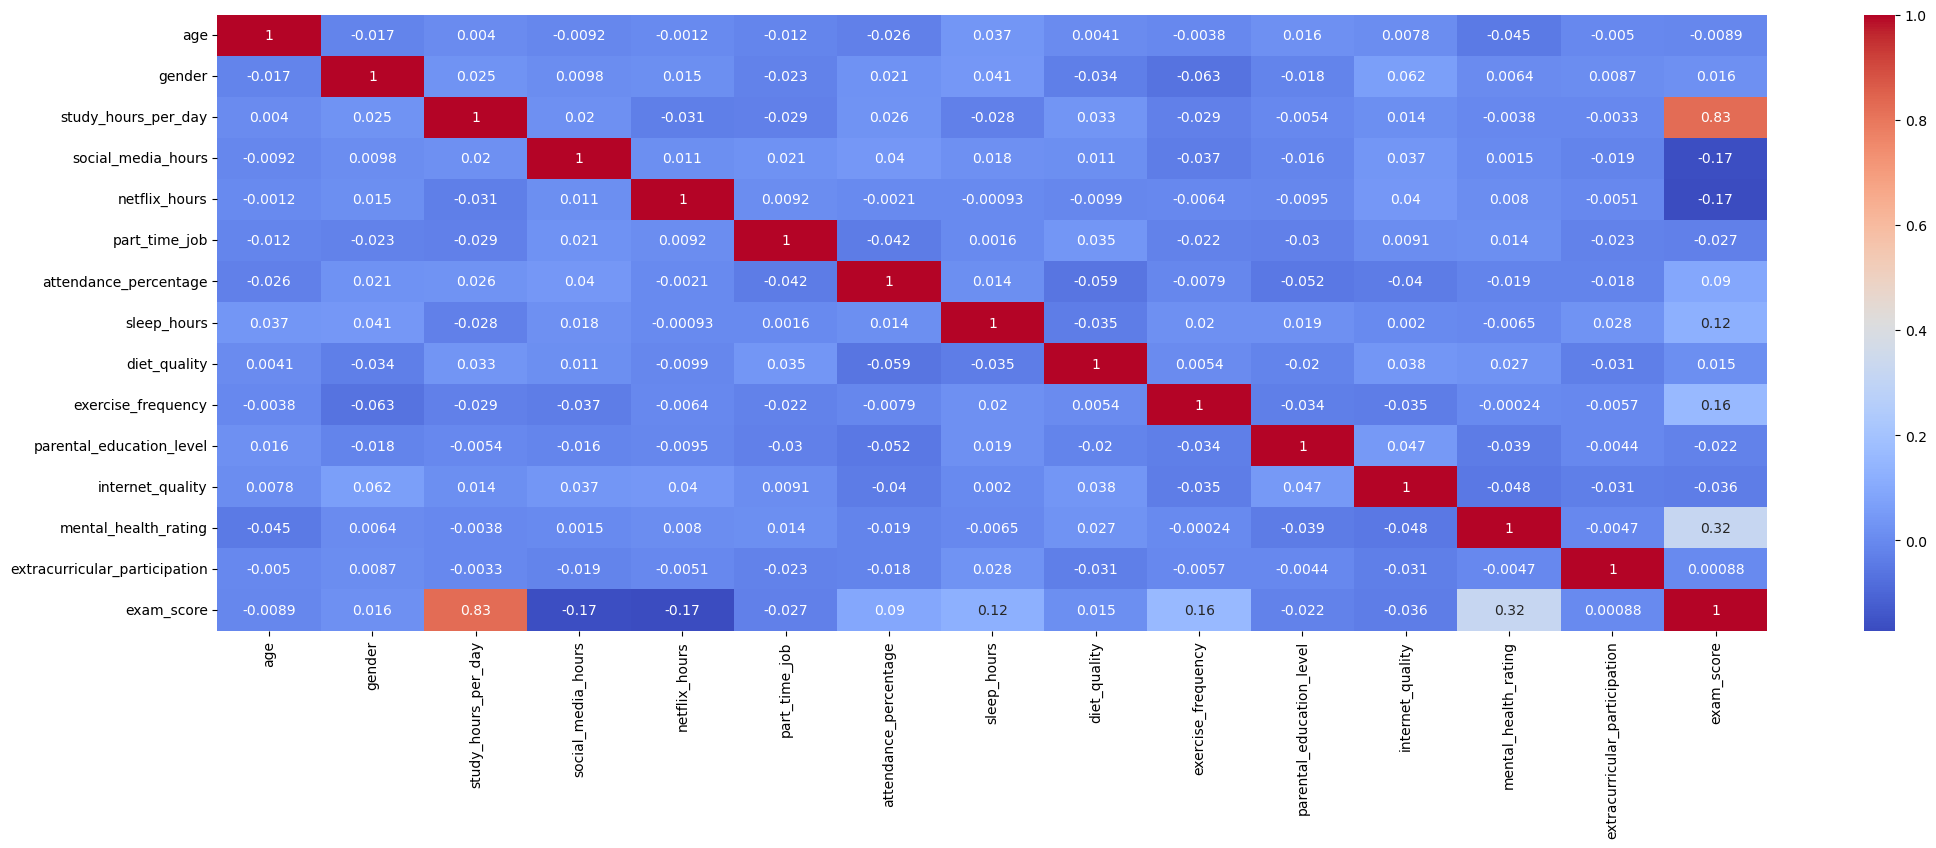

In [61]:
plt.figure(figsize=(25,8))
sat_corr=sat.corr()
sns.heatmap(sat_corr, annot=True, cmap='coolwarm')
plt.show() #heatmap of correlation matrix

**OBSERVATIONS**

Heatmap shows high correlation with study hours per day and exam score.

The other most positive correlations with exam score include attendance percentage, sleep hours, exercise frequency, and mental health rating (although not to a very high degree).

In [79]:
#Setting up multiple linear regression
#Use a train/test split to get a real sense of performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #<-----
from sklearn.metrics import r2_score

# Separate features (X) and target (y)
y = sat['exam_score']
X = sat.drop('exam_score', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Create and train the model
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

#calculate R² score and RMSE pre prediction
r2 = r2_score(y, y_pred)
print("R² Score:", r2)

print ('RMSE: ', mean_squared_error(y, y_pred))



R² Score: 0.901375988180253
RMSE:  28.10176494887543


In [87]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

#calculate R² score and RMSE pre prediction
print ('R²: ', r2_score(y_test, y_test_pred))
print ('RMSE: ', mean_squared_error(y_test, y_test_pred))


R²:  0.898698118936858
RMSE:  25.976749784121015


In [105]:
# List the top 10 most important features from multiple linear regression results
mlr_coefs = model.coef_
mlr_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': mlr_coefs, 'Abs_Coefficient': np.abs(mlr_coefs)})
mlr_feature_importance = mlr_feature_importance.sort_values('Abs_Coefficient', ascending=False)
print('Top 10 Most Important Features (Multiple Linear Regression):')
print(mlr_feature_importance.head(10))

Top 10 Most Important Features (Multiple Linear Regression):
                          Feature  Coefficient  Abs_Coefficient
2             study_hours_per_day     9.541963         9.541963
3              social_media_hours    -2.704224         2.704224
4                   netflix_hours    -2.316685         2.316685
7                     sleep_hours     1.984384         1.984384
12           mental_health_rating     1.953494         1.953494
9              exercise_frequency     1.317249         1.317249
5                   part_time_job     0.395880         0.395880
8                    diet_quality    -0.323219         0.323219
13  extracurricular_participation    -0.163654         0.163654
6           attendance_percentage     0.145140         0.145140


In [126]:
# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [123]:
# Train and evaluate a multiple linear regression model using the normalized data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_test_pred_scaled = model_scaled.predict(X_test_scaled)
print('R² (scaled data):', r2_score(y_test, y_test_pred_scaled))
print('RMSE (scaled data):', mean_squared_error(y_test, y_test_pred_scaled))

R² (scaled data): 0.8986981189368579
RMSE (scaled data): 25.976749784121047


In [124]:
# List the top 10 most important features from the scaled linear regression results
scaled_coefs = model_scaled.coef_
scaled_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': scaled_coefs, 'Abs_Coefficient': np.abs(scaled_coefs)})
scaled_feature_importance = scaled_feature_importance.sort_values('Abs_Coefficient', ascending=False)
print('Top 10 Most Important Features (Scaled Linear Regression):')
print(scaled_feature_importance.head(10))

Top 10 Most Important Features (Scaled Linear Regression):
                  Feature  Coefficient  Abs_Coefficient
2     study_hours_per_day    14.009083        14.009083
12   mental_health_rating     5.559795         5.559795
3      social_media_hours    -3.168908         3.168908
9      exercise_frequency     2.666651         2.666651
4           netflix_hours    -2.489463         2.489463
7             sleep_hours     2.432385         2.432385
6   attendance_percentage     1.363525         1.363525
8            diet_quality    -0.234362         0.234362
5           part_time_job     0.162636         0.162636
0                     age     0.126988         0.126988


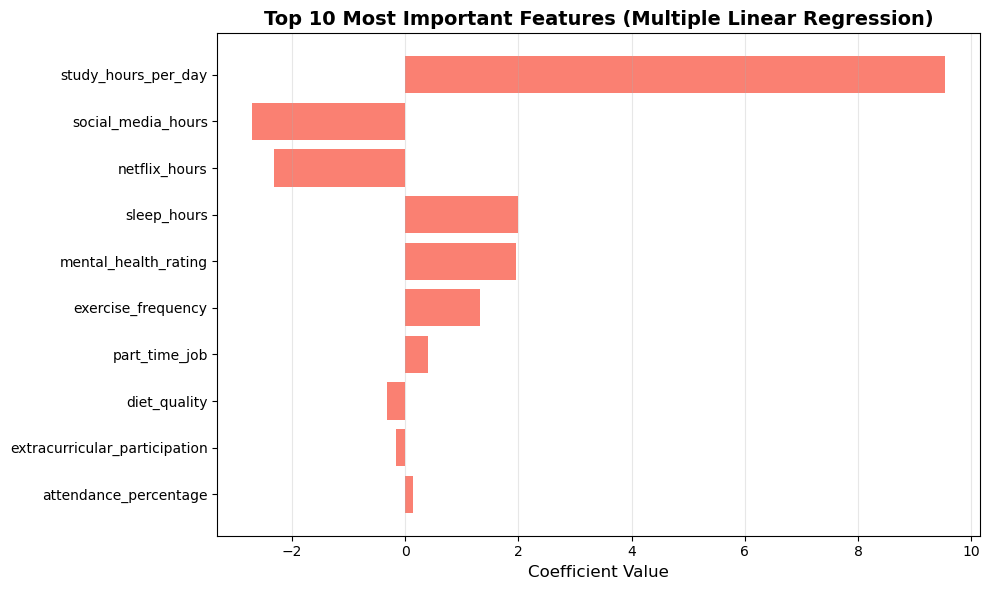

In [128]:
# Bar plot of the top 10 most important features from multiple linear regression results
top_mlr_features = mlr_feature_importance.head(10).sort_values('Abs_Coefficient')
plt.figure(figsize=(10,6))
plt.barh(top_mlr_features['Feature'], top_mlr_features['Coefficient'], color='salmon')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 10 Most Important Features (Multiple Linear Regression)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

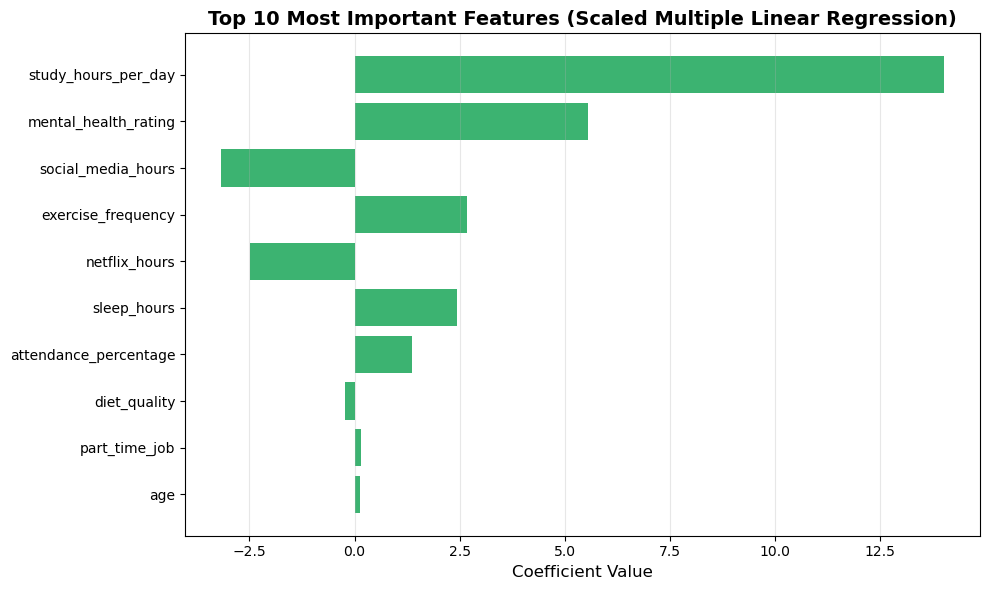

In [127]:
# Bar plot of the top 10 most important features from scaled linear regression results
top_scaled_features = scaled_feature_importance.head(10).sort_values('Abs_Coefficient')
plt.figure(figsize=(10,6))
plt.barh(top_scaled_features['Feature'], top_scaled_features['Coefficient'], color='mediumseagreen')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 10 Most Important Features (Scaled Multiple Linear Regression)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Observations**

Both models tell the same story. Focusing on attending class, studying, getting enough sleep, getting exercise, and keeping your mental health up contribute to higher SAT scores.

Too much Facebook/IG and streaming movies will lower your scores.

R^2 and RMSE scores for both models are very similar. The Scaled Multiple Linear Regression model puts more importance on all features, and increases the importance on attending classes and mental health rating by at least 2x.